In [92]:
import pandas as pd
import numpy as np
import warnings
#warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv('dataset.csv')
print('Shape is: ', data.shape, '\n')
data

Shape is:  (190, 1) 



,Integer;Categorical;Numerical;Numerical;Categorical;Categorical;Categorical;Categorical;Categorical;Categorical;Categorical;Numerical;Ordinal;Ordinal;Categorical;Categorical;Label 1;Label 2;Label 3;Label 4;Label 5;Label 6;Label 7
0,ID;Motorway;SR;NR;TR;VR;SUR1;SUR2;SUR3;UR;FR;O...
1,1;A1;600;1;1;4;6;2;10;0;0;50;0;0;0;1;0;0;0;0;0...
2,2;A1;700;1;5;1;10;6;10;3;1;75;1;1;0;1;0;1;1;0;...
3,3;A1;200;1;5;1;10;6;10;3;4;75;1;1;0;1;0;1;1;0;...
4,4;A1;300;1;5;0;6;10;2;3;4;25;0;0;0;1;0;0;1;0;0...
...,...
185,185;S52;2300;1;12;3;2;2;1;0;0;75;2;1;0;1;0;1;0...
186,186;S52;300;1;14;2;7;10;2;0;0;100;5;5;0;1;1;1;...
187,187;S52;500;1;1;4;1;10;2;0;0;100;5;5;0;1;1;1;1...
188,188;S52;300;1;12;3;2;1;6;0;0;100;1;0;0;1;0;1;1...


### Titles are datatypes, first row is the titles, rest of the rows have all info in one column.

In [94]:
data_types = data.columns[0].split(sep=';')
col_names = data.iloc[0,0].split(sep=';')

In [95]:
holding_array = []
for i in data.iloc[1:190,0]:
    row = i.split(sep=';')
    holding_array.append(row)
    
data = np.array(holding_array)

In [96]:
print('The data types are: ', data_types, '\n')
print('The columns names are: ', col_names, '\n')
print('The shape of the data is: ', data.shape, '\n')
data

The data types are:  ['Integer', 'Categorical', 'Numerical', 'Numerical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Numerical', 'Ordinal', 'Ordinal', 'Categorical', 'Categorical', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7'] 

The columns names are:  ['ID', 'Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt'] 

The shape of the data is:  (189, 23) 



array([['1', 'A1', '600', ..., '0', '0', '0'],
       ['2', 'A1', '700', ..., '0', '1', '0'],
       ['3', 'A1', '200', ..., '0', '1', '0'],
       ...,
       ['187', 'S52', '500', ..., '0', '1', '0'],
       ['188', 'S52', '300', ..., '0', '0', '0'],
       ['189', 'S52', '300', ..., '0', '0', '0']], dtype='<U6')

### Check for missing data

In [97]:
np.nonzero(pd.isnull(data))[0]

array([], dtype=int64)

### No missing data. Lets look at the visualization of the data as well as how it splits with the 7 classification types. First I will write in the columns' full titles and meanings. All of this information can be found at the source of the data on https://archive.ics.uci.edu/ml/datasets/Amphibians#:
#### Col. 1: ID
#### Col. 2: MV is a catergorical data type with two categories, A1 and S52. This data is originally from environmental impact assessment (EIA) reports for two planned road projects (A1 motorway section in Pyrzowice and Beskidy Integration Way on the Bielsko BiaÅ‚a-Wadowice-GÅ‚ogoczÃ³w section of the S52 motorway) in Poland.
#### Col. 3: SR - Surface area of water reservoir(cubic meters).
#### Col. 4: NR - Number of water reservoirs in habitat. The larger the number of reservoirs, the more likely it is that some of them will be suitable for amphibian breeding.
#### Col. 5: TR - Type of water reservoir. This is a categorical data type with categories a-j;  
##### a: reservoirs with natural features that are natural or anthropogenic water reservoirs, not subject to naturalization*
##### b: recently formed reservoirs not subjected to naturalization*
##### c: settling ponds
##### d: water reservoirs located near houses
##### e: technological water reservoirs
##### f: water reservoirs in allotment gardens
##### g: trenches
##### h: wet meadows, flood plains, marshes
##### i: river valleys
##### j: streams and very small watercourses
##### *naturalization refers to the process of removing anthropogenic influences from streamflow time series, to the point that naturalized flows are often considered true natural flows in many studies. See: https://www.tandfonline.com/doi/abs/10.1080/02626667.2020.1839080?journalCode=thsj20
#### Col. 6: VR - Presence of vegetation within the reservoirs. This is a categorical data type with categories a-e:
##### a: no vegetation
##### b: narrow patches at the edges
##### c: areas heavily overgrown
##### d: lush vegetation within the reservoir with some part devoid of vegetation
##### e: reservoirs completely overgrown with a disappearing water table
##### Comment from study: The vegetation in the reservoir favors amphibians, facilitates breeding, and allows the larvae to feed and give shelter. However, excess vegetation can lead to the overgrowth of the pond and water shortages.
#### Col. 7: SUR1* - The dominant types of land cover surrounding the water reservoir.
#### Col. 8: SUR2* - The second most dominant types of land cover surrounding the water reservoir.
#### Col. 9: SUR3* - The third most dominant types of land cover surrounding the water reservoir.
#### *Surrounding land type categories: 
##### a. forest areas (with meadows) and densely wooded areas
##### b. areas of wasteland and meadows
##### c. allotment gardens
##### d. parks and green areas
##### e. dense building development, industrial areas
##### f. dispersed habitation, orchards, gardens
##### g. river valleys
##### h. roads, streets
##### i. agricultural land
##### Comment from study: The most valuable surroundings of water reservoirs for amphibians are areas with the least anthropopressure and proper moisture.
#### Col. 10: UR - Use of water reservoir. Categories are:
##### a. unused by man (very attractive for amphibians)
##### b. recreational and scenic (care work is performed)
##### c. used economically (often fish farming)
##### d. technological
#### Col. 11: FR - The presence of fishing. Categories are:
##### a. lack of or occasional fishing
##### b. intense fishing
##### c. breeding reservoirs
##### Comment from study: The presence of a large amount of fishing, in particular predatory and intense fishing, is not conducive to the presence of amphibians.
#### Col. 12: OR - Percentage access from the edges of the reservoir to undeveloped areas (the proposed percentage ranges are a numerical reflection of the phrases: lack of access, low access, medium access, large access to free space). Percentages, most are factors of 25 with the exception of a few 80 and 99 percents.
#### Col. 13: RR - Minimum distance from the water reservoir to roads. Categorical: [0, 1, 2, 5, 9, 10] representing <50 m, 50-100 m, 100-200 m, 200-500 m, 500 - 1000 m, >1000 m respectively.
##### Comment from study: The greater the distance between the reservoir and the road, the more safety for amphibians.
#### Col. 14: BR - Minimum distance to buildings. Same category assignments as RR. Same comment from study as RR.
#### Col. 15: MR - Maintenance status of the reservoir. Categorical: [0, 1, 2] representing clean, slightly littered, reservoirs heavily or very heavily littered, respectively.
##### Comment from study: Trash causes devastation of the reservoir ecosystem. Backfilling and leveling of water reservoirs with ground and debris should also be considered.
#### Col. 16: CR - Type of shore. Categorical: [1, 2] representing natural and concrete respectively. 
##### Comment from study: A concrete shore of a reservoir is not attractive for amphibians. A vertical concrete shore is usually a barrier for amphibians when they try to leave the water.

#### The rest of the columns are one-hot vectors for the classified types of frogs. There are 7 labels - green frogs, brown frogs, common toad, fire-bellied toad, tree frog, common newt, great crested newt - in that respective order.

Let's split the features and the labels.

In [98]:
X = data[:, 0:16]
X = X[:,1:len(X)]
X[:, 1:len(X)] = X[:, 1:len(X)].astype(int)
X = pd.DataFrame(X, columns = col_names[1:-7])

Y = data[:, -7:len(data)].astype(int)
Y = pd.DataFrame(Y, columns = col_names[-7:len(col_names)])

print('Feature shape: ', X.shape)
print('Check that we have all the labels. The label shape is: ', Y.shape)

Feature shape:  (189, 15)
Check that we have all the labels. The label shape is:  (189, 7)


In [99]:
X

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1
1,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
2,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1
3,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1
4,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,S52,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
185,S52,300,1,14,2,7,10,2,0,0,100,5,5,0,1
186,S52,500,1,1,4,1,10,2,0,0,100,5,5,0,1
187,S52,300,1,12,3,2,1,6,0,0,100,1,0,0,1


In [100]:
Y

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0
2,0,1,1,0,0,1,0
3,0,0,1,0,0,0,0
4,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...
184,0,1,0,0,0,0,0
185,1,1,1,1,0,1,0
186,1,1,1,1,0,1,0
187,0,1,1,0,0,0,0


Lets get some summary stats.

In [101]:
for a in X:
    cats = np.unique(X[a])
    print(a, 'has categories', cats)

Motorway has categories ['A1' 'S52']
SR has categories ['100' '1000' '10000' '10050' '1100' '115000' '1300' '1400' '150' '1500'
 '15000' '1600' '16000' '1700' '1800' '1900' '19300' '200' '2000' '2100'
 '22000' '2300' '2400' '250' '2500' '25000' '2600' '26000' '28300' '29000'
 '30' '300' '3000' '30000' '31000' '3300' '3400' '350' '3500' '360000'
 '3800' '400' '4000' '40000' '4100' '4300' '450' '4500' '50' '500' '5000'
 '50000' '500000' '600' '6300' '700' '7000' '750' '800' '8000' '80000'
 '8250' '8300' '900' '9000' '9100']
NR has categories ['1' '10' '12' '2' '3' '4' '5' '6' '7' '9']
TR has categories ['1' '11' '12' '14' '15' '2' '5' '7']
VR has categories ['0' '1' '2' '3' '4']
SUR1 has categories ['1' '10' '14' '2' '4' '6' '7' '9']
SUR2 has categories ['1' '10' '11' '2' '6' '7' '9']
SUR3 has categories ['1' '10' '11' '2' '5' '6' '7' '9']
UR has categories ['0' '1' '3']
FR has categories ['0' '1' '2' '3' '4']
OR has categories ['100' '25' '50' '75' '80' '99']
RR has categories ['0' '1' 

SR, NR, and OR  are not categorical but all of these should be changed to numbers first cause python.

In [102]:
X['Motorway'][X['Motorway'] == 'A1'] = 1
X['Motorway'][X['Motorway'] == 'S52'] = 2

for a in X:
    X[a] = X[a].astype(int)

#### Category index:
##### Motorway - [A1, S52] = [1, 2]
##### TR - [a-j] need 10 = [?] we have [1,2,5,7,11,12,14,15] so 8 or 15?
##### VR - [a-e] = [0-4]
##### SURS - [a-i] need 9 = [?] we have [1,2,4,5,6,7,9,10,11,14] so 10 or 14?
##### UR - [a-d] = [0-3]
##### FR - [a-c] need 3 = [?] we have [0-4] so 5
##### RR - [0,1,2,5,9,10] = [0,1,2,5,9,10]
##### BR - same as RR = same as RR
##### MR - [0,1,2] = [0,1,2]
##### CR - [1,2] = [1,2]

In [103]:
X.corr()

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
Motorway,1.000000,0.086427,0.057642,0.100231,-0.176202,0.105116,0.187313,0.095528,0.010625,0.021675,0.039938,-1.590623e-01,-0.194291,-7.921934e-02,0.023120
SR,0.086427,1.000000,0.652757,-0.122781,0.004203,0.181343,-0.052974,-0.071238,0.236866,0.284751,0.009107,-5.639194e-02,-0.057961,-3.164385e-02,-0.024867
NR,0.057642,0.652757,1.000000,-0.215548,-0.075317,0.139474,0.069668,-0.049166,0.319417,0.388893,-0.034093,-1.157088e-01,-0.110566,-5.910721e-02,-0.046678
TR,0.100231,-0.122781,-0.215548,1.000000,0.112762,-0.042078,-0.117862,-0.072630,-0.373549,-0.394966,0.192270,2.008387e-01,0.270011,-2.426252e-02,-0.029283
VR,-0.176202,0.004203,-0.075317,0.112762,1.000000,-0.030341,-0.171089,-0.195974,-0.542904,-0.537696,0.128873,2.371158e-01,0.287492,-2.914166e-02,-0.087452
SUR1,0.105116,0.181343,0.139474,-0.042078,-0.030341,1.000000,-0.160468,-0.047971,0.062386,0.041018,-0.210956,-1.356056e-01,-0.171300,-6.309247e-02,-0.033348
SUR2,0.187313,-0.052974,0.069668,-0.117862,-0.171089,-0.160468,1.000000,-0.087872,0.117055,0.137161,-0.085239,-3.342458e-02,-0.044804,-5.363718e-02,-0.038333
SUR3,0.095528,-0.071238,-0.049166,-0.072630,-0.195974,-0.047971,-0.087872,1.000000,0.061688,0.103372,-0.053642,-8.907968e-02,-0.093517,8.936879e-02,0.096352
UR,0.010625,0.236866,0.319417,-0.373549,-0.542904,0.062386,0.117055,0.061688,1.000000,0.846052,-0.129848,-1.765183e-01,-0.266323,-1.031329e-01,0.047638
FR,0.021675,0.284751,0.388893,-0.394966,-0.537696,0.041018,0.137161,0.103372,0.846052,1.000000,-0.085933,-1.662666e-01,-0.234890,-7.457969e-02,0.077365


Lets look at how many frog types each reservoir sample has.

In [105]:
np.sum(Y)

Green frogs           108
Brown frogs           148
Common toad           124
Fire-bellied toad      58
Tree frog              71
Common newt            58
Great crested newt     21
dtype: int64

Among all the reservoirs, the brown frog, common toad, and green frogs are the most prevalant.

To start I'll look at brown frogs as they're the most common and great crested newts as they're the least common. Lets see the distribution of the frogs based on location.

In [106]:
print('The number of unique types of frogs at each reservation is: ', np.sum(Y.to_numpy(), axis=1))
print('The average number of kinds of frogs per reservoir is ', np.mean(np.sum(Y, axis=1)))
print('The median number of kinds of frogs per reservoir is ', np.median(np.sum(Y, axis=1)))

The number of unique types of frogs at each reservation is:  [0 3 3 1 5 0 1 3 2 2 1 2 2 3 2 5 3 2 4 3 2 3 2 2 2 4 1 3 5 3 2 1 2 1 2 2 1
 3 1 1 3 3 2 1 3 5 2 4 4 3 5 3 1 2 6 2 5 1 4 2 4 2 5 2 3 2 1 1 1 4 3 3 1 1
 4 1 2 1 1 3 6 2 2 3 5 4 3 3 5 1 5 5 4 4 5 7 3 7 7 7 3 2 7 7 2 5 1 3 2 4 7
 7 6 6 2 2 1 4 4 2 3 6 1 1 0 1 7 6 0 1 3 0 3 2 1 2 5 4 1 2 6 4 6 6 2 4 5 5
 5 5 3 2 3 6 6 3 5 1 6 1 6 6 1 4 4 3 5 5 1 1 7 1 1 6 6 2 1 1 0 5 6 2 3 2 1
 5 5 2 2]
The average number of kinds of frogs per reservoir is  3.111111111111111
The median number of kinds of frogs per reservoir is  3.0


In [45]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [107]:
X

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,1,600,1,1,4,6,2,10,0,0,50,0,0,0,1
1,1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
2,1,200,1,5,1,10,6,10,3,4,75,1,1,0,1
3,1,300,1,5,0,6,10,2,3,4,25,0,0,0,1
4,1,600,2,1,4,10,2,6,0,0,99,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
185,2,300,1,14,2,7,10,2,0,0,100,5,5,0,1
186,2,500,1,1,4,1,10,2,0,0,100,5,5,0,1
187,2,300,1,12,3,2,1,6,0,0,100,1,0,0,1


In [110]:
# Brown frogs by motorway
ind_A1 = np.nonzero((X.iloc[:,0] == 1).to_numpy())[0]
Y_A1 = Y.to_numpy()[ind_A1, 1]
ind_S52 = np.nonzero((X.iloc[:,0] != 1).to_numpy())[0]
Y_S52 = Y.to_numpy()[ind_S52, 1]

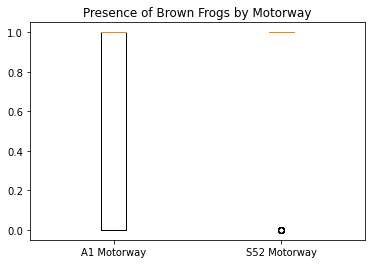

In [111]:
%matplotlib inline
fig, ax = plt.subplots()

ax.boxplot((Y_A1, Y_S52));
ax.set_xticklabels(['A1 Motorway', 'S52 Motorway']);
ax.set_title('Presence of Brown Frogs by Motorway');

This doesn't give much information.

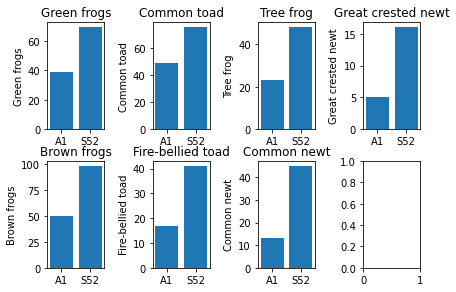

In [112]:
fig, axs = plt.subplots(2,4)
plt.tight_layout()

x = 0
y = 0
for i in Y.columns:
    Y_A1 = Y[i][ind_A1]
    Y_S52 = Y[i][ind_S52]
    
    #Counting all the ones gives the number of toads
    axs[x,y].bar(['A1', 'S52'], [np.count_nonzero(Y_A1), np.count_nonzero(Y_S52)]);
    
    axs[x,y].set_ylabel(i);
    axs[x,y].set_title(i);
    
    if x >= 1:
        x = 0
        y += 1
    else:
        x += 1

The S52 Motorway area is either a larger project or in an area that has more reservoirs. We can check this.

In [114]:
print('Reservoirs in the A1 region: ', sum(X['NR'][ind_A1]))
print('Reservoirs in the S52 region: ', sum(X['NR'][ind_S52]))

Reservoirs in the A1 region:  117
Reservoirs in the S52 region:  179


So the S52 definitely has more reservoirs. This will likely skew the data in its favor however, the proportion of frogs in the area of the S52 motorway is still not really accounted for by the number of reservations. Lets check the area covered by the reservations for each motorway area.

In [115]:
A1_area = X['SR'][ind_A1]
S52_area = X['SR'][ind_S52]

In [116]:
print('Reservoir area for A1 region is ', np.sum(A1_area))
print('Reservoir area for S52 region is ', np.sum(S52_area))
print('Their ratio is ', np.sum(A1_area) / np.sum(S52_area))

Reservoir area for A1 region is  398330
Reservoir area for S52 region is  1422350
Their ratio is  0.28005062045206874


The ratio of the areas for the regions, 0.28, is less than the ratio of frogs in the regions, at least for the Brown Frog and Great Crested Newt - 0.5 and 0.333 respectively. The ratio of reservoirs was greater than 0.5

It is possible that the more common frogs require less space or less specific resources and thus seem to be at wherever there is a reservoir. Lets look at the two frogs with the area.

In [23]:
Y['Brown frogs']

0      0
1      1
2      1
3      0
4      1
      ..
184    1
185    1
186    1
187    1
188    1
Name: Brown frogs, Length: 189, dtype: int64

In [24]:
ind = np.nonzero(Y['Brown frogs'].to_numpy())
Area_bf = X['SR'].astype(int).to_numpy()[ind]
ind = np.nonzero(Y['Great crested newt'].to_numpy())
Area_gcn = X['SR'].astype(int).to_numpy()[ind]

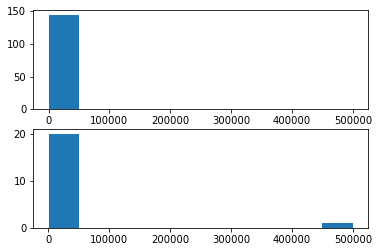

In [25]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.hist(Area_bf);
ax2.hist(Area_gcn);

Lets ignore large outliers.